In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
df1=pd.read_csv('/content/train.csv')
df2=pd.read_csv('/content/test.csv')
print(df1)
print(df2)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    Male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
df2.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
df_f=pd.concat([df1, df2], axis=0)

In [ ]:
df_i=df_f.set_index('PassengerId')

In [ ]:
df_i.shape

(1309, 11)

In [ ]:
df_i_copy=df_i.copy()

In [ ]:
df_i_copy.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
df_i_copy['Age'].fillna(df_i_copy['Age'].median(skipna=True),inplace=True)
df_i_copy['Embarked'].fillna(df_i_copy['Embarked'].value_counts().idxmax(), inplace=True)
df_i_copy.drop(['Cabin'],inplace=True,axis=1)
df_i_copy['Fare'].fillna(df_i_copy['Age'].mean(skipna=True),inplace=True)
df_i_copy['Sex']=df_i_copy['Sex'].str.lower()
print(df_i_copy['Sex'].unique())

['male' 'female']


In [ ]:
df_i_copy.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [ ]:
df_i_copy1 = df_i_copy.iloc[:891,:]
df_i_copy2 = df_i_copy.iloc[891:,:]
print(df_i_copy1.tail(5))

             Survived  Pclass                                      Name  \
PassengerId                                                               
887               0.0       2                     Montvila, Rev. Juozas   
888               1.0       1              Graham, Miss. Margaret Edith   
889               0.0       3  Johnston, Miss. Catherine Helen "Carrie"   
890               1.0       1                     Behr, Mr. Karl Howell   
891               0.0       3                       Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch      Ticket   Fare Embarked  
PassengerId                                                          
887            male  27.0      0      0      211536  13.00        S  
888          female  19.0      0      0      112053  30.00        S  
889          female  28.0      1      2  W./C. 6607  23.45        S  
890            male  26.0      0      0      111369  30.00        C  
891            male  32.0      0      0      370376   

In [ ]:
print(df_i_copy2.head(5))

             Survived  Pclass                                          Name  \
PassengerId                                                                   
892               NaN       3                              Kelly, Mr. James   
893               NaN       3              Wilkes, Mrs. James (Ellen Needs)   
894               NaN       2                     Myles, Mr. Thomas Francis   
895               NaN       3                              Wirz, Mr. Albert   
896               NaN       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

                Sex   Age  SibSp  Parch   Ticket     Fare Embarked  
PassengerId                                                         
892            male  34.5      0      0   330911   7.8292        Q  
893          female  47.0      1      0   363272   7.0000        S  
894            male  62.0      0      0   240276   9.6875        Q  
895            male  27.0      0      0   315154   8.6625        S  
896          female  22.0      1

In [ ]:
df_i_copy1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
testing = pd.get_dummies(df_i_copy1, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
# testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test_df = testing
final_test_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,,,,
1,0.0,22.0,1,0,7.2500,0,0,1,0,0,1,1
2,1.0,38.0,1,0,71.2833,1,0,0,1,0,0,0
3,1.0,26.0,0,0,7.9250,0,0,1,0,0,1,0
4,1.0,35.0,1,0,53.1000,1,0,0,0,0,1,0
5,0.0,35.0,0,0,8.0500,0,0,1,0,0,1,1


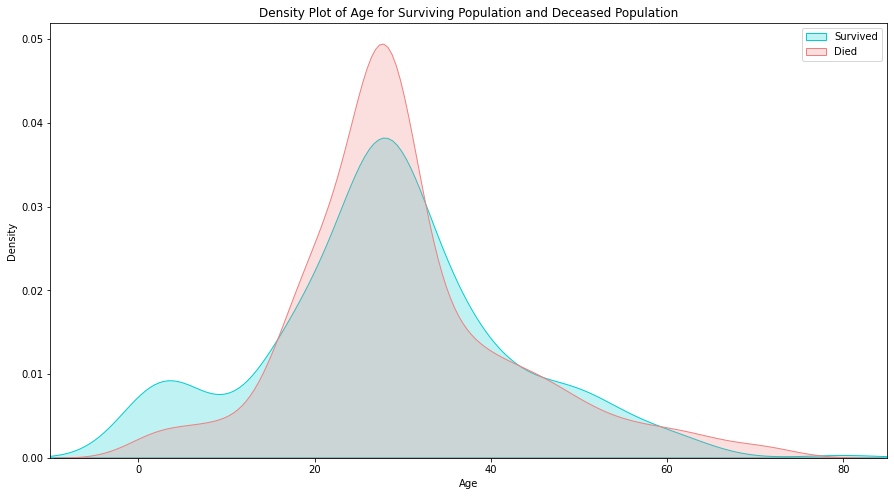

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_i_copy1["Age"][df_i_copy1.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_i_copy1["Age"][df_i_copy1.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

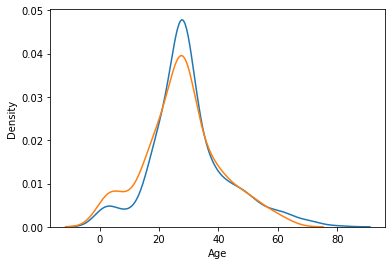

In [ ]:
sns.kdeplot(df_i_copy1['Age'][df_i_copy1.Sex=='male'])
sns.kdeplot(df_i_copy1['Age'][df_i_copy1.Sex=='female'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


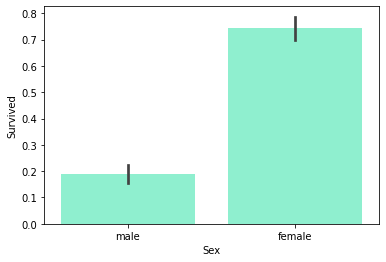

In [ ]:
sns.barplot('Sex', 'Survived', data=df_i_copy1, color="aquamarine")
plt.show()

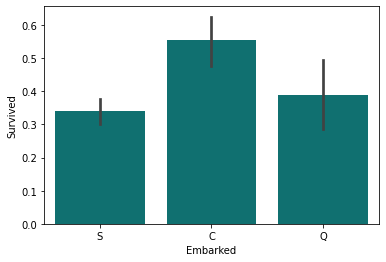

In [ ]:
sns.barplot('Embarked', 'Survived', data=df_i_copy1, color="teal")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


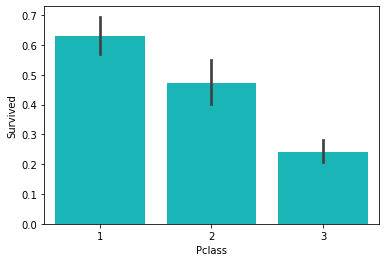

In [ ]:
sns.barplot('Pclass', 'Survived', data=df_i_copy1, color="darkturquoise")
plt.show()

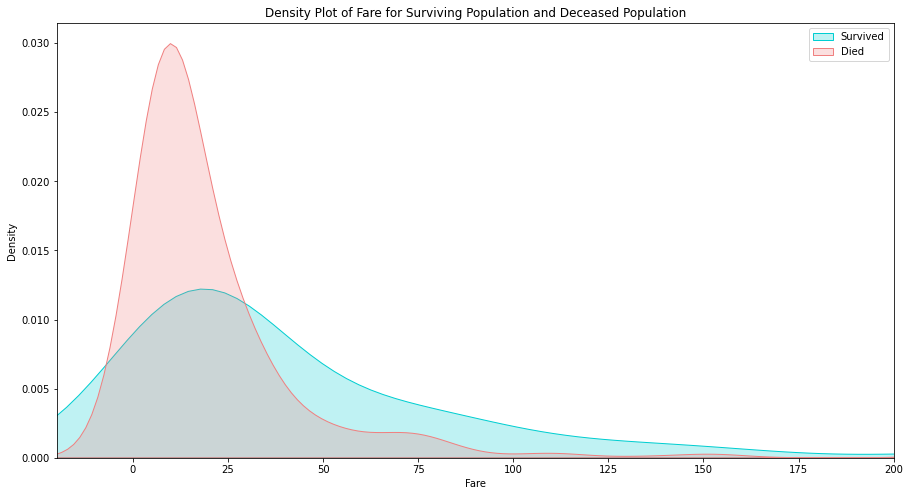

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_i_copy1["Fare"][df_i_copy1.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_i_copy1["Fare"][df_i_copy1.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

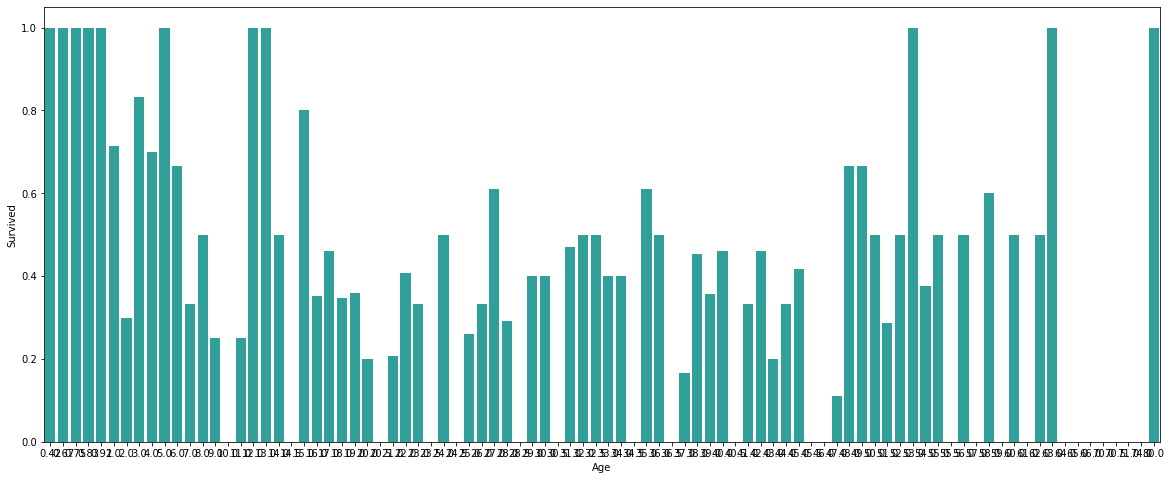

In [ ]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_i_copy1[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [ ]:
# numpy.where(condition[, x, y])
df_i_copy1['TravelAlone']=np.where((df_i_copy1['SibSp']+df_i_copy1['Parch'])>0,0,1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_i_copy1.drop(['SibSp','Parch'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_i_copy1

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
PassengerId,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
887,0.0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


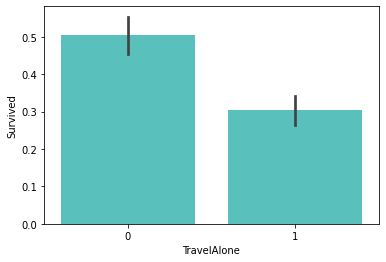

In [ ]:
sns.barplot('TravelAlone', 'Survived', data=df_i_copy1, color="mediumturquoise")
plt.show()